#**Name: Sachet Utekar**

##**Task 1: Netflix Share Prices**

##**Dataset Link:** https://bit.ly/3DMcgMK  

##**Importing libraries and taking care of warnings**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

##**Importing Dataset**

In [ ]:
dataset = pd.read_csv('/content/netflix.csv', header = 0)
dataset.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


##**Analysing the Data**

In [ ]:
#getting the shape of the data
#(rows * columns)
dataset.shape

(4856, 7)

In [ ]:
dataset.describe() #describing the dataset

,High,Low,Open,Close,Volume,Adj Close
count,4856.000000,4856.000000,4856.000000,4856.000000,4.856000e+03,4856.000000
mean,104.417595,101.223064,102.841799,102.882117,1.686502e+07,102.882117
std,155.588870,151.003701,153.329766,153.379795,1.939578e+07,153.379795
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.971072,3.830357,3.892857,3.893929,6.333750e+06,3.893929
50%,20.756429,20.010715,20.446428,20.429286,1.089410e+07,20.429286
75%,125.750000,122.302502,124.007502,123.742502,2.021828e+07,123.742502
max,598.760010,583.679993,585.799988,589.520081,3.234140e+08,589.520081


In [ ]:
dataset.info() #information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4856 non-null   object 
 1   High       4856 non-null   float64
 2   Low        4856 non-null   float64
 3   Open       4856 non-null   float64
 4   Close      4856 non-null   float64
 5   Volume     4856 non-null   float64
 6   Adj Close  4856 non-null   float64
dtypes: float64(6), object(1)
memory usage: 265.7+ KB


In [ ]:
dataset.isna().any() #checking for missing values

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [ ]:
dataset.nunique() #finding out unique records

Date         4856
High         4304
Low          4292
Open         4327
Close        4390
Volume       4717
Adj Close    4390
dtype: int64

##**Visualising the Closing Price**

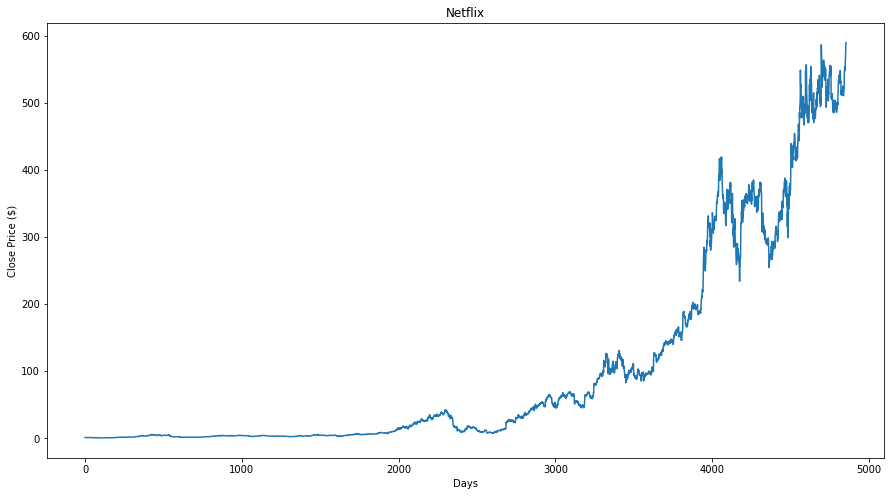

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(dataset['Close'])
plt.show()

In [ ]:
df = dataset[['Close']] #Analysing the close column having closing price
df.head()

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571
4,1.071429


##**Prediction**

In [ ]:
#Create a variable to predict the 'X' days out into future
future_days = 25

#Create a new Column (target) shifted 'X units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(5)

,Close,Prediction
0,1.196429,0.999286
1,1.210000,1.027857
2,1.157143,1.172857
3,1.103571,1.214286
4,1.071429,1.276429


In [ ]:
#Create the feature dataset(X) and convert it to a numpy array
X = np.array(df.drop(['Prediction'],1))[:-future_days]

In [ ]:
X

array([[  1.19642901],
       [  1.21000004],
       [  1.157143  ],
       ...,
       [519.29998779],
       [514.25      ],
       [517.57000732]])

In [ ]:
#Create the target dataset(y) and convert into numpy array and get all target values except last 'X' rows/days

y = np.array(df['Prediction'])[:-future_days]

In [ ]:
y

array([  0.999286  ,   1.02785695,   1.17285705, ..., 582.07000732,
       588.54998779, 589.52008057])

##**Importing necessary libraries for regression, splitting and plotting graph** 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Spliting the data into 80% training and 20% testing sets resp
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Create models
#Create a Descison Tree regressor model
tree = DecisionTreeRegressor().fit(X_train,y_train)

#Create a Linear Regression model
lr = LinearRegression().fit(X_train,y_train)

In [ ]:
#Get the last rows of feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[527.07000732],
       [533.0300293 ],
       [533.5       ],
       [528.21002197],
       [533.53997803],
       [533.97998047],
       [541.64001465],
       [535.96002197],
       [530.76000977],
       [535.97998047],
       [537.30999756],
       [540.67999268],
       [547.95001221],
       [542.95001221],
       [530.30999756],
       [532.2800293 ],
       [531.04998779],
       [513.63000488],
       [511.76998901],
       [515.40997314],
       [516.48999023],
       [518.90997314],
       [519.29998779],
       [514.25      ],
       [517.57000732]])

In [ ]:
#Show the model tree Prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)

print()

#Show the model linear regrssion prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[515.15002441 510.82000732 517.34997559 524.89001465 520.54998779
 519.9699707  515.84002686 512.40002441 488.23999023 512.40002441
 517.91998291 518.90997314 521.86999512 543.71002197 488.23999023
 553.33001709 552.15997314 547.58001709 550.11999512 558.91998291
 552.7800293  569.19000244 582.07000732 588.54998779 589.52008057]

[534.93453739 540.96603214 541.44163875 536.08822313 541.48209619
 541.92737516 549.67926872 543.93116138 538.66879046 543.95135922
 545.29732592 548.70773413 556.06493597 551.00497581 538.21338169
 540.20703812 538.96224591 521.333362   519.45104076 523.1346757
 524.22764439 526.67664781 527.07133953 521.96079212 525.32061308]


#**Data Visualisation**

##**Visualizing Tree Model Prediction**

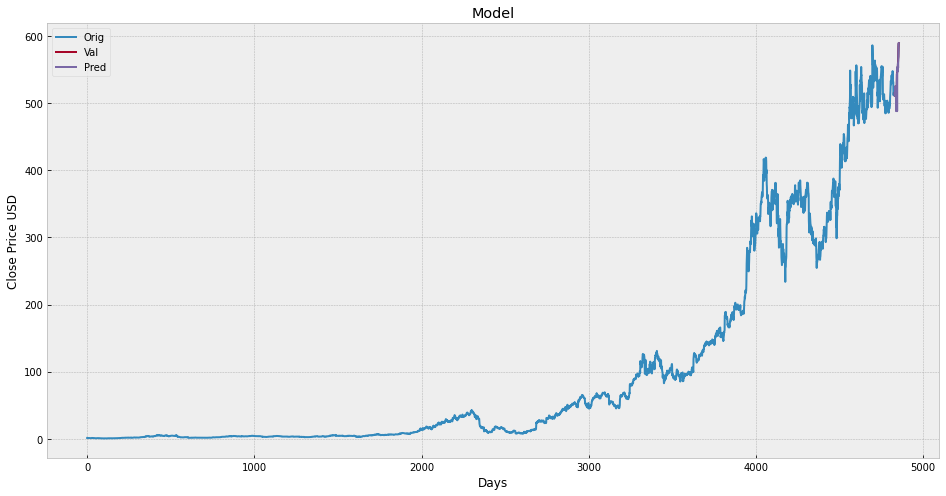

In [ ]:
#Visualize the data
Prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Prediction

plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred']);

##**Visualizing Linear Model Regression Prediction**

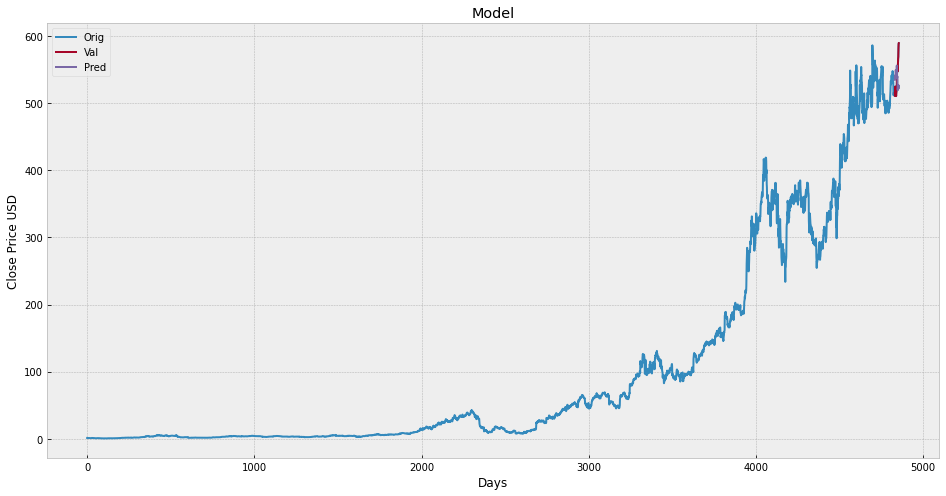

In [ ]:
#Visualize the data
Prediction = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = Prediction

plt.figure(figsize = (16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred']);